# Spatial Analysis
Doing basic cluster analysis using geocoded data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('geocoded/1898_address_geocoded.csv', index_col=0)
df2 = pd.read_csv('geocoded/1913_address_geocoded.csv', index_col=0)
df1.head(3)

,name,gender,region,final,addresses,Lat,Lon
0,Aueringer Erhard,m,NaN,American,E 4th Street 151,40.725145,-73.985836
1,Brandstaedter Herman,m,NaN,American,Houston Street E 175,40.723025,-73.988158
2,Deixler Max,m,NaN,American,Allen Street 96,40.719451,-73.990626


In [3]:
df2.head(3)

,name,gender,region,country,addresses,Lat,Lon
0,Albanian Roumanian Co,Unknown,FALSE,FALSE,W 37th Street 261,40.753169,-73.989534
1,Garbade Emily D,f,FALSE,FALSE,Houston Street W 78,40.727278,-73.999148
2,Frese Ida L,f,German Jew,FALSE,W 33rd Street 2,40.749331,-73.988379


## data cleaning

### 1898

In [4]:
dict(df1['final'].value_counts()[:3])

{'German': 570, 'British': 412, 'FALSE': 174}

In [5]:
def clean_region1(region):
    if (region=='Germanic Language Speaking') or (region=='Germanic language Speaking')  or (region=='Swiss')\
        or (region=='German-Austrian') or (region=='German-Austria') or (region=='German ') or (region=='Austrian')\
        or (region=='German Muslim') or (region=='German Speaking') or (region=='German, Austrian, Czech?')\
        or (region=='German Austrian') or (region=='German') or (region=='German Empire') or (region=='erman'):
        return 'Germanic'
    elif (region=='English') or (region=='Irish') or (region=='Scottish') or (region=='Ireland')\
        or (region=='British Empire') or (region=='Englsih') or (region=='Scotish') or (region=='scottish'):
        return 'British'
    elif (region=='Italian') or (region=='Spanish') or (region=='Greek') or (region=='Portuguese')\
        or (region=='Ialian') or (region=='Spanish/Portugal'):
        return 'Southern European'
    elif (region=='French  ') or (region=='French') or (region=='Dutch') or (region=='Danish')\
        or (region=='Swiss-French') or (region=='Belgian'):
        return 'Western European'
    elif (region=='Russian') or (region=='Polish') or (region=='Romanian') or (region=='Eastern European')\
        or (region=='Hungarian') or (region=='Czech') or (region=='Armenian') or (region=='Eastern European ')\
        or (region=='Russia'):
        return 'Eastern European'
    elif (region=='German Jew') or (region=='Irish Jew') or (region=='Russian Jew') or (region=='Italian Jew')\
        or (region=='German Jew') or (region=='French Jewish') or (region=='British Jew') or (region=='Polish Jew'):
        return 'Jewish'
    elif (region=='American') or (region=='New York'):
        return 'American'
    elif (region=='Scandinavian') or (region=='Norwegian') or (region=='Swedish') or (region=='Norwigian'):
        return 'Scandinavian'
    elif (region=='SyroLebanese') or (region=='Musilm') or (region=='Middle Eastern') or (region=='Turkey')\
        or (region=='Ethiopian') or (region=='South Africa') or (region=='Muslim'):
        return 'Middle Eastern'
    elif (region=='Asian') or (region=='Chinese') or (region=='Chilese') or (region=='Korean'):
        return 'Asian'
    elif (region=='Fasle') or (region=='FALSE'):
        return 'False'

In [6]:
df1['region_cleaned'] =  df1['final'].apply(clean_region1)
df1.head(3)

,name,gender,region,final,addresses,Lat,Lon,region_cleaned
0,Aueringer Erhard,m,NaN,American,E 4th Street 151,40.725145,-73.985836,American
1,Brandstaedter Herman,m,NaN,American,Houston Street E 175,40.723025,-73.988158,American
2,Deixler Max,m,NaN,American,Allen Street 96,40.719451,-73.990626,American


In [7]:
dict(df1['region_cleaned'].value_counts()).keys()

dict_keys(['Germanic', 'British', 'False', 'Southern European', 'Western European', 'Jewish', 'Eastern European', 'Scandinavian', 'Asian', 'Middle Eastern', 'American'])

### 1913

In [8]:
df2['region'].value_counts()

FALSE              1359
Russian Jew         306
British             199
German Jew           96
German-Austrian      64
Irish Jew            52
French Jew           10
Name: region, dtype: int64

In [9]:
df2['country'].value_counts()

FALSE        1980
Jewish         59
German         21
Irish          13
British         7
Austrian        3
Norwegian       2
Russian         1
Name: country, dtype: int64

In [10]:
def clean_region2(region):
    if (region=='Russian Jew') or (region=='German Jew') or (region=='Irish Jew') or (region=='French Jew'):
        return 'Jewish'
    elif (region=='British') or (region=='Irish'):
        return 'British'
    elif (region=='German-Austrian') or (region=='German'):
        return 'German'
    else:
        return 'False'

In [11]:
df2['region_cleaned'] =  df2['region'].apply(clean_region2)
df2.head(3)

,name,gender,region,country,addresses,Lat,Lon,region_cleaned
0,Albanian Roumanian Co,Unknown,FALSE,FALSE,W 37th Street 261,40.753169,-73.989534,False
1,Garbade Emily D,f,FALSE,FALSE,Houston Street W 78,40.727278,-73.999148,False
2,Frese Ida L,f,German Jew,FALSE,W 33rd Street 2,40.749331,-73.988379,Jewish


## Spatial Analysis

### 1898

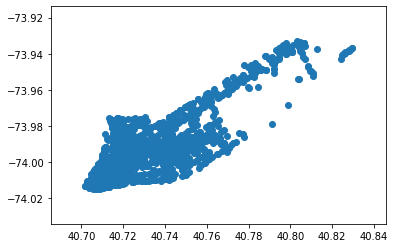

In [12]:
plt.scatter(df1['Lat'], df1['Lon'])

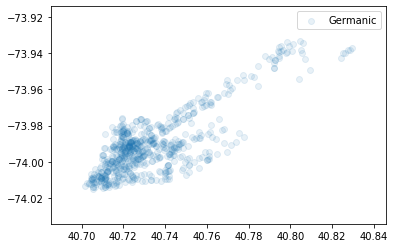

In [25]:
df1G = df1[df1['region_cleaned']=='Germanic']
plt.scatter(df1G['Lat'],df1G['Lon'], label='Germanic', alpha=0.1)
plt.legend()

Text(0.5, 1.0, '1898 Manhattan Restuarant Data Ethnic Clusters')

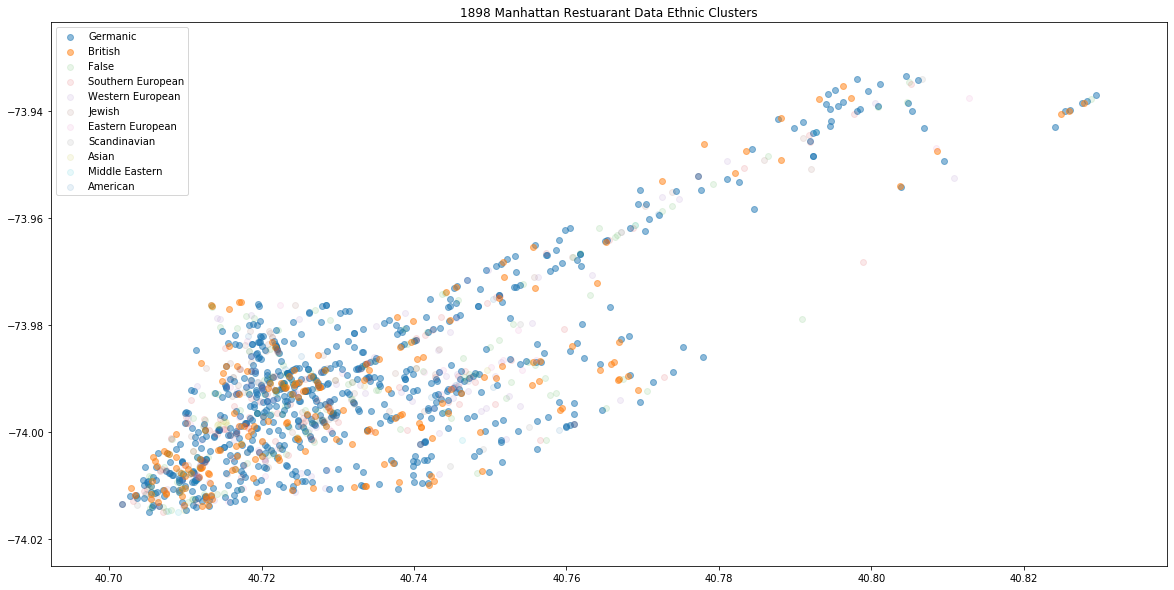

In [23]:
plt.figure(figsize=(20,10))
for region in list(dict(df1['region_cleaned'].value_counts()).keys()):
    if region == 'False':
        df1_region = df1[df1['region_cleaned']==region]
        plt.scatter(df1_region['Lat'],df1_region['Lon'], label=region, alpha=0.1)
    elif (region=='Germanic') or (region=='British'):
        df1_region = df1[df1['region_cleaned']==region]
        plt.scatter(df1_region['Lat'],df1_region['Lon'], label=region, alpha=0.5)
    else:
        df1_region = df1[df1['region_cleaned']==region]
        plt.scatter(df1_region['Lat'],df1_region['Lon'], label=region, alpha=0.1)
plt.legend()
plt.title('1898 Manhattan Restuarant Data Ethnic Clusters')

### 1913

Text(0.5, 1.0, '1913 Manhattan Restuarant Data Ethnic Clusters')

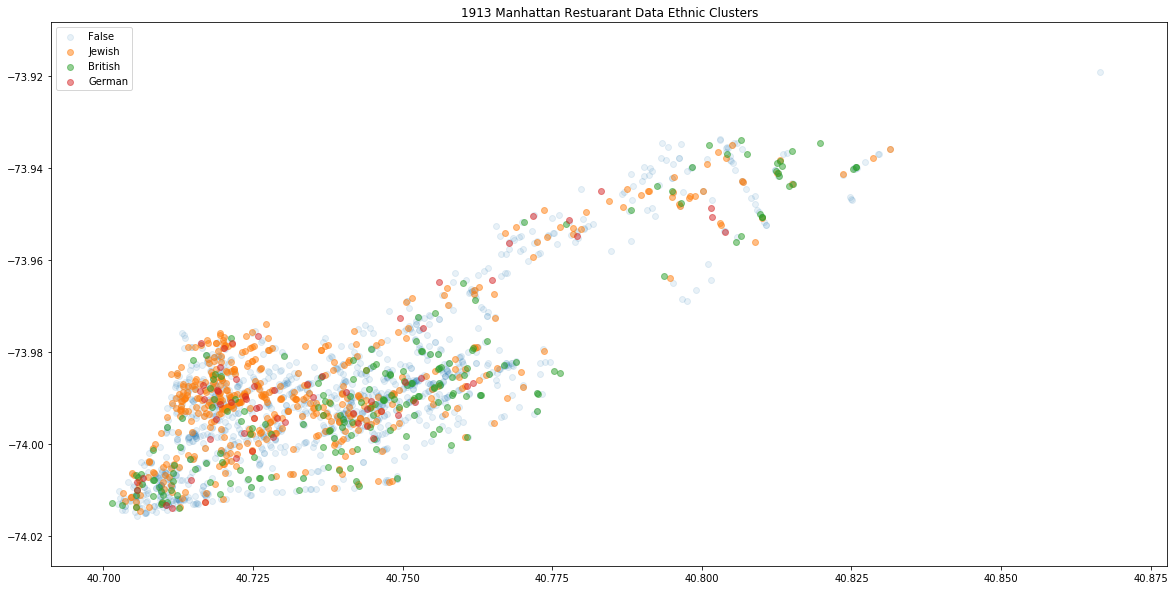

In [15]:
plt.figure(figsize=(20,10))
for region in list(dict(df2['region_cleaned'].value_counts()).keys()):
    if region == 'False':
        df2_region = df2[df2['region_cleaned']==region]
        plt.scatter(df2_region['Lat'],df2_region['Lon'], label=region, alpha=0.1)
    else:
        df2_region = df2[df2['region_cleaned']==region]
        plt.scatter(df2_region['Lat'],df2_region['Lon'], label=region, alpha=0.5)
plt.legend()
plt.title('1913 Manhattan Restuarant Data Ethnic Clusters')